In [1]:
# Download the dataset
!kaggle datasets download -d priyamchoksi/credit-card-transactions-dataset

# Unzip the dataset
!unzip credit-card-transactions-dataset.zip


Dataset URL: https://www.kaggle.com/datasets/priyamchoksi/credit-card-transactions-dataset
License(s): apache-2.0
 94% 137M/145M [00:01<00:00, 129MB/s]
100% 145M/145M [00:01<00:00, 124MB/s]
Archive:  credit-card-transactions-dataset.zip
  inflating: credit_card_transactions.csv  


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import joblib
import os

In [3]:
df = pd.read_csv("credit_card_transactions.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.100702e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03,4.682575e+04
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02,2.583400e+04
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.001000e+03
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00,2.511400e+04
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00,4.586000e+04
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00,6.831900e+04
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00,9.940300e+04


In [6]:
# Load the CSV file
df = pd.read_csv('credit_card_transactions.csv')

# Remove rows with NaN in 'merch_zipcode'
df_cleaned = df.dropna(subset=['merch_zipcode'])

# Limit the rows to 1,100,702
df_cleaned = df_cleaned.iloc[:1100702]

# Check the result
print(df_cleaned.info())

# Save the cleaned data to a new CSV file
df_cleaned.to_csv('cleaned_data.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
Index: 1100702 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1100702 non-null  int64  
 1   trans_date_trans_time  1100702 non-null  object 
 2   cc_num                 1100702 non-null  int64  
 3   merchant               1100702 non-null  object 
 4   category               1100702 non-null  object 
 5   amt                    1100702 non-null  float64
 6   first                  1100702 non-null  object 
 7   last                   1100702 non-null  object 
 8   gender                 1100702 non-null  object 
 9   street                 1100702 non-null  object 
 10  city                   1100702 non-null  object 
 11  state                  1100702 non-null  object 
 12  zip                    1100702 non-null  int64  
 13  lat                    1100702 non-null  float64
 14  long                   

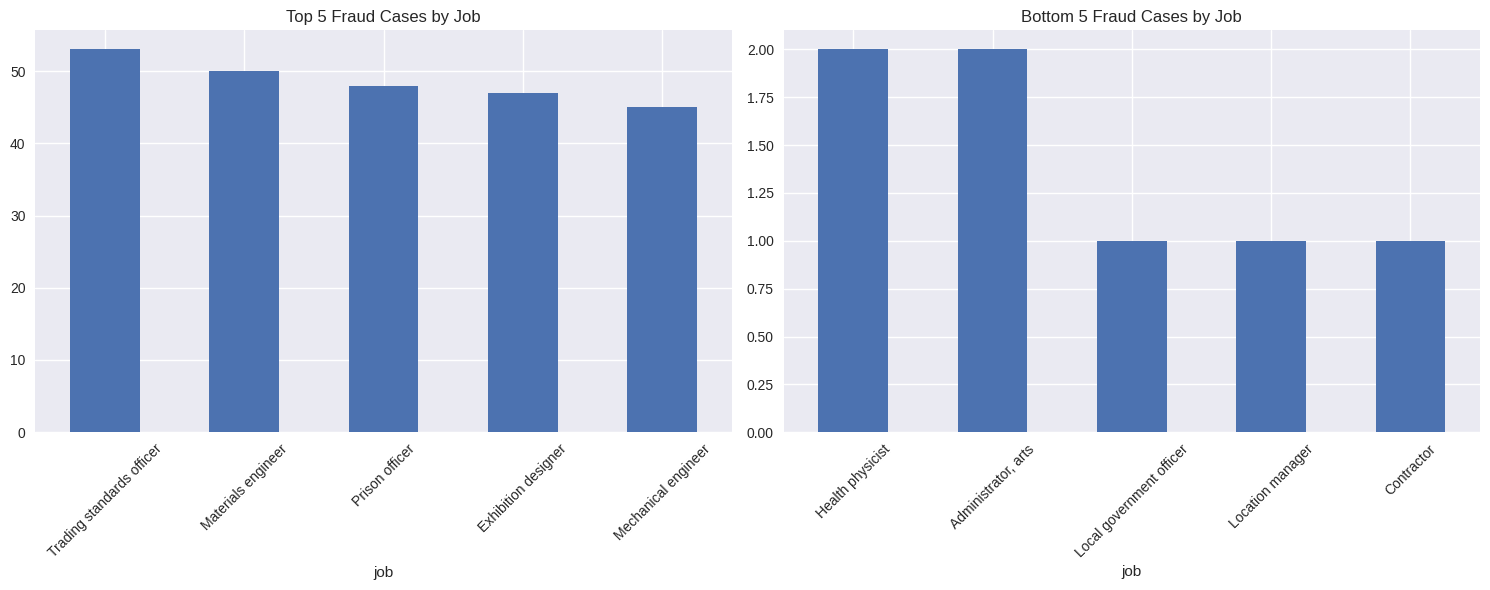

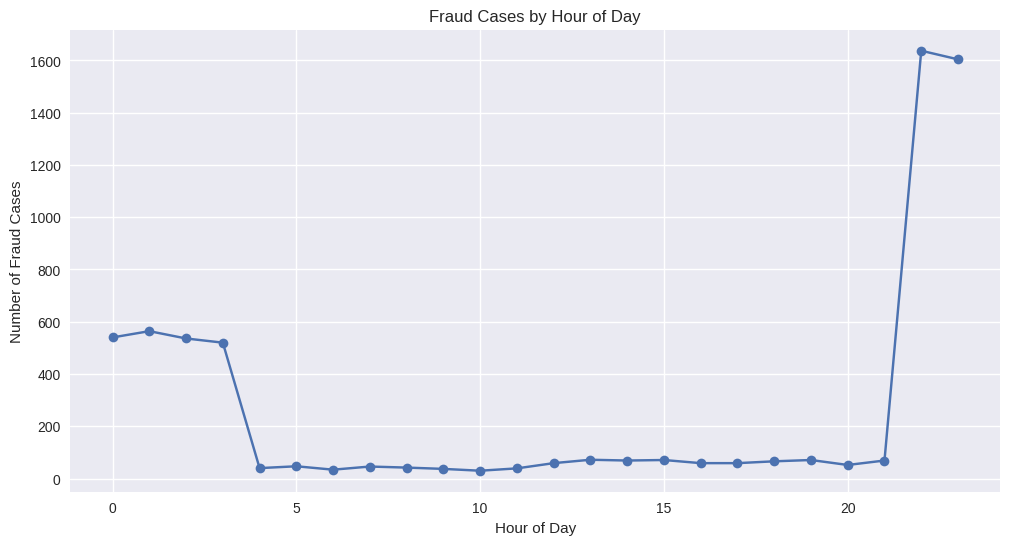

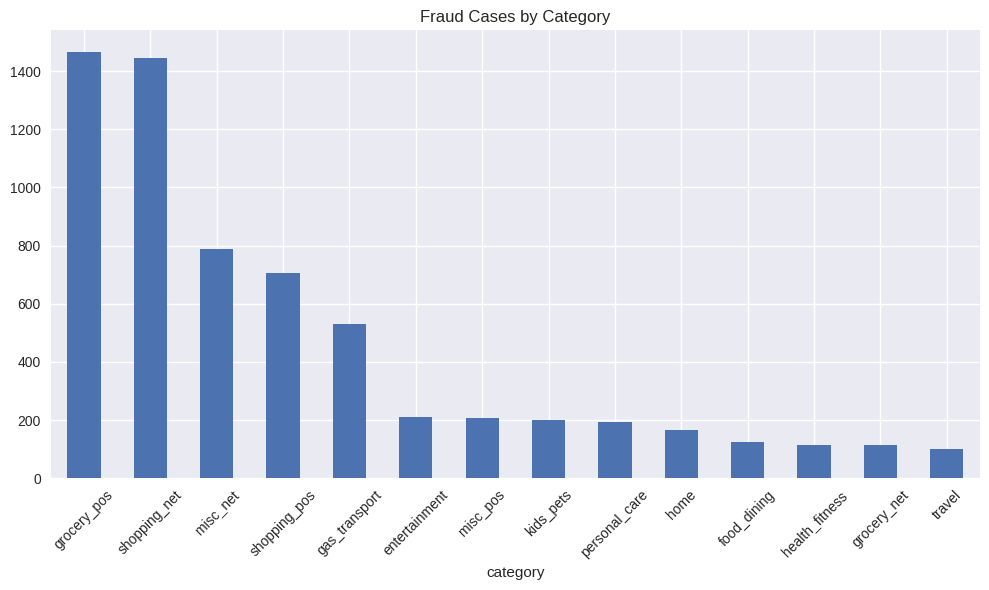

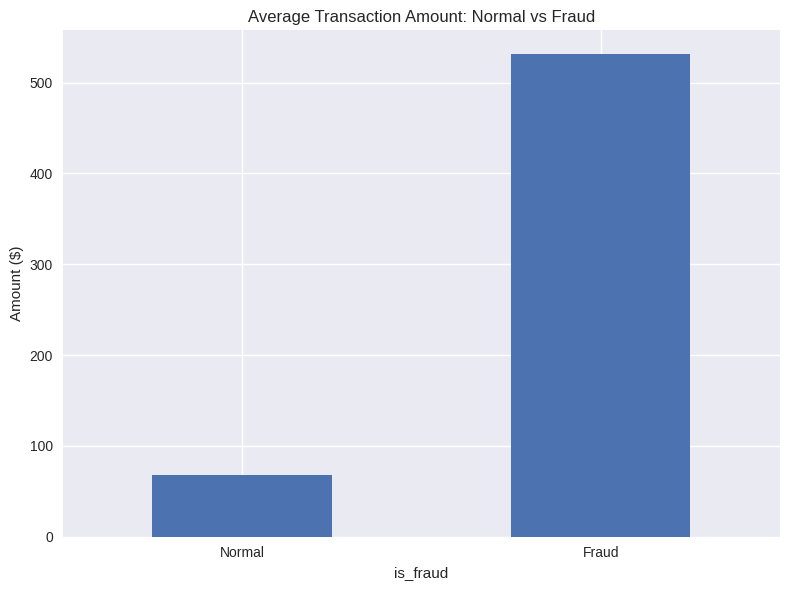


Top 5 jobs with highest fraud cases:
job
Trading standards officer    53
Materials engineer           50
Prison officer               48
Exhibition designer          47
Mechanical engineer          45
Name: count, dtype: int64

Bottom 5 jobs with lowest fraud cases:
job
Health physicist            2
Administrator, arts         2
Local government officer    1
Location manager            1
Contractor                  1
Name: count, dtype: int64

Hourly distribution of fraud cases:
hour
0      540
1      564
2      536
3      520
4       40
5       47
6       34
7       46
8       42
9       37
10      30
11      39
12      59
13      72
14      69
15      71
16      59
17      59
18      66
19      71
20      52
21      69
22    1637
23    1604
Name: count, dtype: int64

Category-wise fraud cases:
category
grocery_pos       1467
shopping_net      1444
misc_net           788
shopping_pos       705
gas_transport      530
entertainment      211
misc_pos           206
kids_pets          202

In [7]:
plt.style.use('seaborn-v0_8')

# Load the data
df = pd.read_csv('/content/cleaned_data.csv')  # Update with your file path

# Convert transaction time to datetime and extract the hour
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour

# Top and bottom 5 jobs by fraud cases
job_fraud = df[df['is_fraud'] == 1]['job'].value_counts()
top_5_jobs = job_fraud.head()
bottom_5_jobs = job_fraud.tail()

# Visualization: Fraud by Job
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
top_5_jobs.plot(kind='bar')
plt.title("Top 5 Fraud Cases by Job")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
bottom_5_jobs.plot(kind='bar')
plt.title("Bottom 5 Fraud Cases by Job")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Visualization: Fraud by Hour
hourly_fraud = df[df['is_fraud'] == 1]['hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
hourly_fraud.plot(kind='line', marker='o')
plt.title("Fraud Cases by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Fraud Cases")
plt.grid(True)
plt.show()

# Visualization: Fraud by Category
category_fraud = df[df['is_fraud'] == 1]['category'].value_counts()

plt.figure(figsize=(10, 6))
category_fraud.plot(kind='bar')
plt.title("Fraud Cases by Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average transaction amount: Normal vs Fraud
avg_amount = df.groupby('is_fraud')['amt'].mean()

plt.figure(figsize=(8, 6))
avg_amount.plot(kind='bar')
plt.title("Average Transaction Amount: Normal vs Fraud")
plt.xticks([0, 1], ['Normal', 'Fraud'], rotation=0)
plt.ylabel("Amount ($)")
plt.tight_layout()
plt.show()

# Print statistical summaries
print("\nTop 5 jobs with highest fraud cases:")
print(top_5_jobs)

print("\nBottom 5 jobs with lowest fraud cases:")
print(bottom_5_jobs)

print("\nHourly distribution of fraud cases:")
print(hourly_fraud)

print("\nCategory-wise fraud cases:")
print(category_fraud)

print("\nAverage transaction amount:")
print(avg_amount)


In [8]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

Loading data...
Selected: 300000 rows
Fraud transactions: 6363
Normal transactions: 293637
Processing data...

Training Random Forest...

Training Random Forest...

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     58727
           1       0.97      0.73      0.84      1273

    accuracy                           0.99     60000
   macro avg       0.98      0.87      0.92     60000
weighted avg       0.99      0.99      0.99     60000



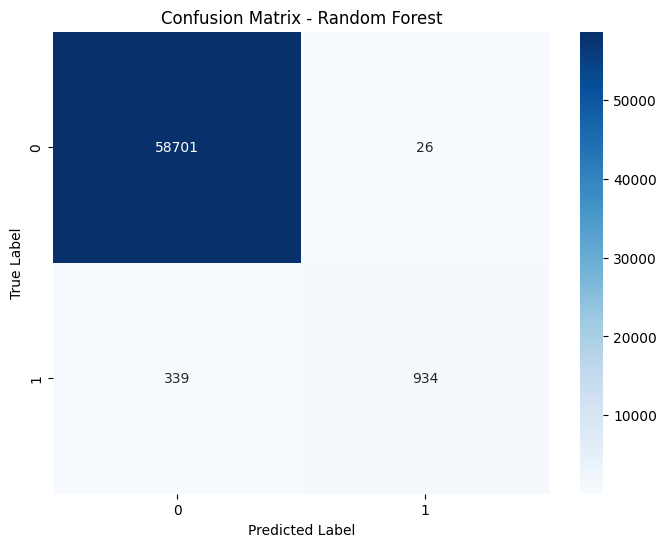

Random Forest saved to: fraud_models/random_forest

Training Logistic Regression...

Training Logistic Regression...

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     58727
           1       0.78      0.35      0.49      1273

    accuracy                           0.98     60000
   macro avg       0.88      0.68      0.74     60000
weighted avg       0.98      0.98      0.98     60000



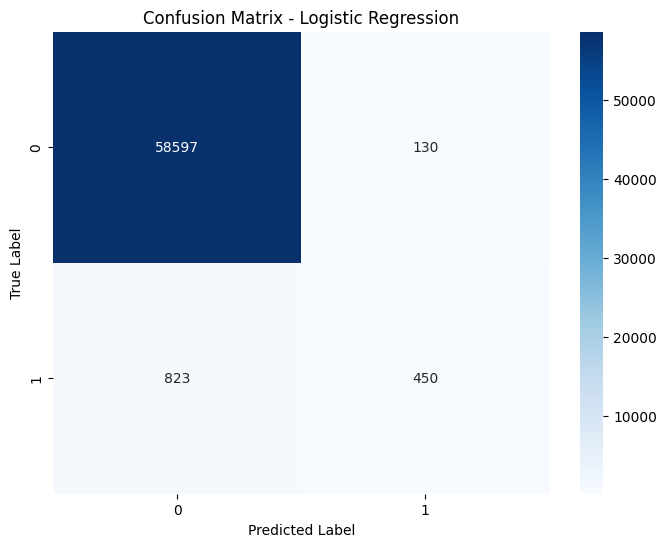

Logistic Regression saved to: fraud_models/logistic_regression

Training XGBoost...

Training XGBoost...

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58727
           1       0.92      0.84      0.88      1273

    accuracy                           1.00     60000
   macro avg       0.96      0.92      0.94     60000
weighted avg       1.00      1.00      1.00     60000



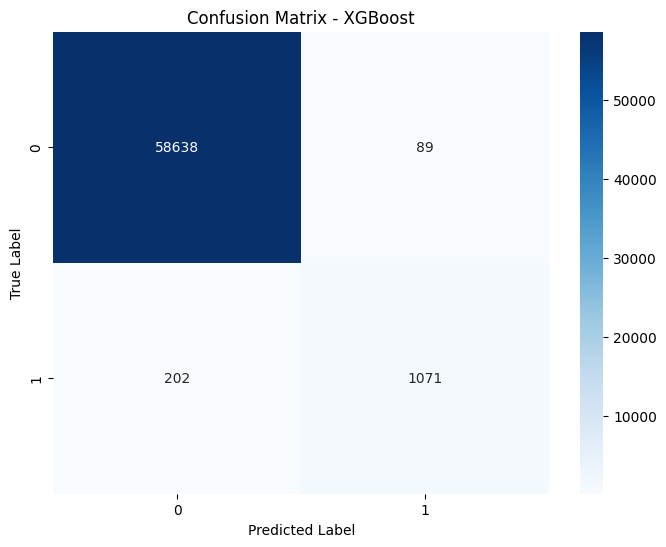

XGBoost saved to: fraud_models/xgboost


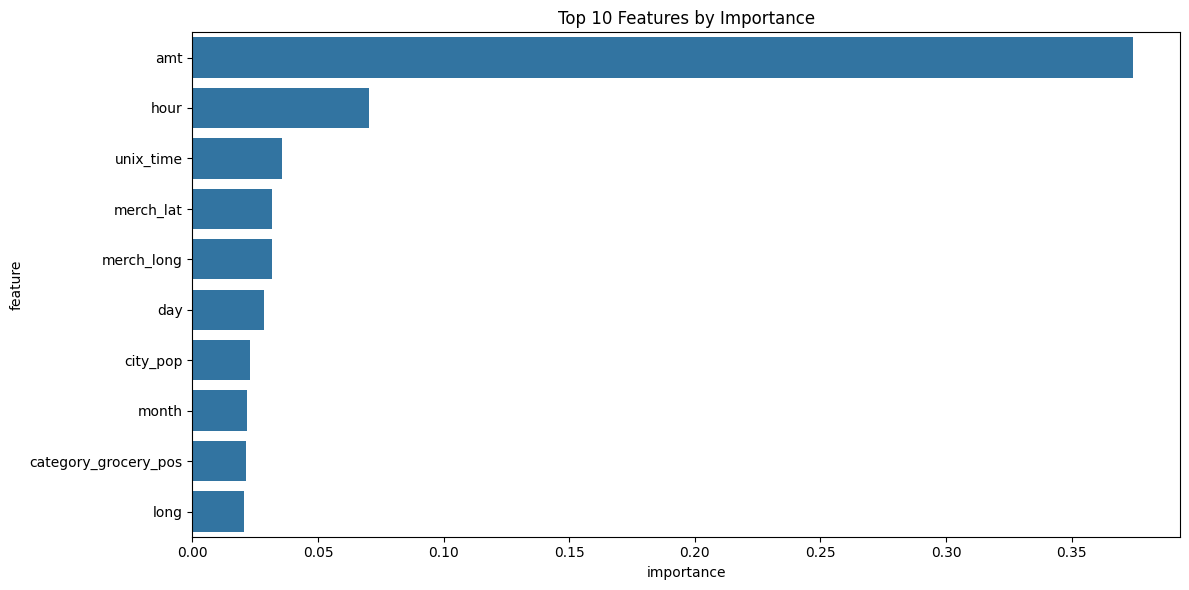


Top 10 Features:
                  feature  importance
0                     amt    0.374397
7                    hour    0.070108
4               unix_time    0.035569
5               merch_lat    0.031715
6              merch_long    0.031591
8                     day    0.028447
3                city_pop    0.022730
9                   month    0.021921
707  category_grocery_pos    0.021394
2                    long    0.020507


In [3]:
# Function to load and reduce data
def load_and_reduce_data(file_path, n_samples=300000):
    print("Loading data...")

    # Read data
    df = pd.read_csv(file_path)

    # Separate fraud and normal transactions
    fraud_df = df[df['is_fraud'] == 1]
    normal_df = df[df['is_fraud'] == 0]

    # Sample normal transactions
    n_fraud = len(fraud_df)
    n_normal = n_samples - n_fraud

    normal_df_sampled = normal_df.sample(n=n_normal, random_state=42)

    # Combine data
    reduced_df = pd.concat([fraud_df, normal_df_sampled])

    # Shuffle data
    reduced_df = reduced_df.sample(frac=1, random_state=42).reset_index(drop=True)

    print(f"Selected: {len(reduced_df)} rows")
    print(f"Fraud transactions: {n_fraud}")
    print(f"Normal transactions: {n_normal}")

    return reduced_df

# Function to prepare data
def prepare_data(df):
    print("Processing data...")

    # Extract time-related features
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['hour'] = df['trans_date_trans_time'].dt.hour
    df['day'] = df['trans_date_trans_time'].dt.day
    df['month'] = df['trans_date_trans_time'].dt.month

    # Drop unnecessary columns
    features_to_drop = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last',
                       'street', 'city', 'zip', 'dob', 'trans_num', 'merch_zipcode']
    df = df.drop(features_to_drop, axis=1)

    # Encode categorical columns
    categorical_cols = ['merchant', 'category', 'gender', 'state', 'job']
    df_encoded = pd.get_dummies(df, columns=categorical_cols)

    # Optimize data types
    float_cols = df_encoded.select_dtypes(include=['float64']).columns
    df_encoded[float_cols] = df_encoded[float_cols].astype('float32')

    int_cols = df_encoded.select_dtypes(include=['int64']).columns
    df_encoded[int_cols] = df_encoded[int_cols].astype('int32')

    # Split features and target
    y = df_encoded['is_fraud']
    X = df_encoded.drop('is_fraud', axis=1)

    return X, y

# Function to train and evaluate models
def train_and_evaluate(X_train, X_test, y_train, y_test, model_name):
    print(f"\nTraining {model_name}...")

    if model_name == 'Random Forest':
        model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    elif model_name == 'Logistic Regression':
        model = LogisticRegression(random_state=42, max_iter=1000)
    elif model_name == 'XGBoost':
        model = xgb.XGBClassifier(random_state=42)

    # Train model
    model.fit(X_train, y_train)

    # Evaluate
    y_pred = model.predict(X_test)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return model

# Function to save model, scaler, and metadata
def save_model_with_metadata(model, scaler, feature_names, model_name, save_dir='fraud_models'):
    os.makedirs(save_dir, exist_ok=True)
    model_path = f"{save_dir}/{model_name.lower().replace(' ', '_')}"
    os.makedirs(model_path, exist_ok=True)

    joblib.dump(model, f"{model_path}/model.joblib")
    joblib.dump(scaler, f"{model_path}/scaler.joblib")
    joblib.dump(feature_names, f"{model_path}/feature_names.joblib")
    print(f"{model_name} saved to: {model_path}")

def main():
    # Load and reduce data
    df = load_and_reduce_data('cleaned_data.csv', n_samples=300000)

    # Prepare data
    X, y = prepare_data(df)
    del df
    gc.collect()

    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train and evaluate models
    models = ['Random Forest', 'Logistic Regression', 'XGBoost']
    trained_models = {}

    for model_name in models:
        print(f"\nTraining {model_name}...")
        model = train_and_evaluate(X_train_scaled, X_test_scaled, y_train, y_test, model_name)
        trained_models[model_name] = model

        # Save model and metadata
        save_model_with_metadata(model, scaler, X.columns, model_name)

    # Random Forest feature importance
    rf_model = trained_models['Random Forest']
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
    plt.title('Top 10 Features by Importance')
    plt.tight_layout()
    plt.show()

    print("\nTop 10 Features:")
    print(feature_importance.head(10))

if __name__ == "__main__":
    main()

In [ ]:
def load_model_with_metadata(model_name, save_dir='fraud_models'):
    """
    Load the model, scaler, and feature metadata from the specified directory.
    """
    print(f"Loading {model_name} model...")
    model_path = f"{save_dir}/{model_name.lower().replace(' ', '_')}"
    
    model = joblib.load(f"{model_path}/model.joblib")
    scaler = joblib.load(f"{model_path}/scaler.joblib")
    feature_names = joblib.load(f"{model_path}/feature_names.joblib")
    
    print(f"{model_name} model, scaler, and metadata loaded successfully.")
    return model, scaler, feature_names

def prepare_input_data(new_data, feature_names):
    """
    Prepare input data to match the feature order used during model training.
    """
    # Ensure new_data is a DataFrame
    if isinstance(new_data, dict):
        new_data = pd.DataFrame([new_data])
    elif isinstance(new_data, list):
        new_data = pd.DataFrame(new_data)
    
    # Align feature order
    new_data = new_data.reindex(columns=feature_names, fill_value=0)
    return new_data

def make_prediction(new_data, model, scaler, feature_names):
    """
    Make predictions using the loaded model.
    """
    # Prepare and scale input data
    input_data = prepare_input_data(new_data, feature_names)
    input_data_scaled = scaler.transform(input_data)
    
    # Predict
    predictions = model.predict(input_data_scaled)
    probabilities = model.predict_proba(input_data_scaled)[:, 1]
    
    return predictions, probabilities

def test_with_real_data(test_data_path, model_name="Random Forest"):
    """
    Test the model with real data from a CSV file.
    """
    # Load the model, scaler, and feature names
    model, scaler, feature_names = load_model_with_metadata(model_name)
    
    # Load test data
    test_data = pd.read_csv(test_data_path)
    
    # Ensure that the test data has the same features as the training data
    print(f"Test data columns: {test_data.columns.tolist()}")
    
    # Predict on test data
    predictions, probabilities = make_prediction(test_data, model, scaler, feature_names)
    
    # Add predictions and probabilities to the test data for analysis
    test_data['predictions'] = predictions
    test_data['fraud_probability'] = probabilities
    
    # Print the first few rows with predictions and probabilities
    print(test_data[['predictions', 'fraud_probability']].head())
    
    # Optionally, save the predictions
    test_data.to_csv("test_predictions.csv", index=False)

if __name__ == "__main__":
    # Example usage with real data
    test_data_path = 'your_test_data.csv'  # Replace with your test dataset path
    test_with_real_data(test_data_path)
